# G2M insight for Cab Investment firm


### The Client

 XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

### Project delivery :


You have been provided with multiple data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify the right company to make their investment.

The outcome of your delivery will be a presentation to XYZ’s Executive team. This presentation will be judged based on the visuals provided, the quality of your analysis and the value of your recommendations and insights. 

### Task :

=Review the Source Documentation

=Understand the field names and data types

=Identify relationships across the files

=Field/feature transformations

=Determine which files should be joined versus which ones should be appended

=Create master data and explain the relationship

=Identify and remove duplicates

=Perform other analysis like NA value and outlier detection

The idea is to create a hypothesis, engage with the data, think critically, and use various analytical approaches to produce unique insights.

You are not limited to only utilizing the data you have been provided.

We encourage you to find third party data sets which correspond to the overall theme and geographical properties of the data provided.  For Example: you can leverage US holiday data/ weather data

Also, do research on overall cab industry in US and try to relate that with the trend in data Analysis 



Create multiple hypothesis and investigate:

You will need to generate 5-7 hypothesis initially to investigate as some will not prove what you are expecting.

For Example: “Is there any seasonality in number of customers using the cab service?”

Areas to investigate:

=Which company has maximum cab users at a particular time period?

=Does margin proportionally increase with increase in number of customers?

=What are the attributes of these customer segments?

Although not required, we encourage you to document the process and findings

=What is the business problem?

=What are the properties of the data provided (data intake report)

=What steps did you take in order to create an applicable data set?

=How did you prepare and perform your analysis?

=What type of analysis did you perform?

=Why did you choose to use certain analytical techniques over others?

=What were the results?

Prepare a presentation that summarizes your analysis and recommendations and identify which company is performing better and is a better investment opportunity for XYZ.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
import itertools
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
import datetime
from datetime import datetime, timedelta
import seaborn as sns
%matplotlib inline

## Importing Data Sets / Data Wrangling For the  Data frames



## US Holiday Dates Data Frames

In [2]:
df_USHolidayDates = pd.read_csv('USHolidayDates .csv')
df_USHolidayDates

,Date,Holiday,WeekDay,Month,Day,Year
0,2004-07-04,4th of July,Sunday,7,4,2004
1,2005-07-04,4th of July,Monday,7,4,2005
2,2006-07-04,4th of July,Tuesday,7,4,2006
3,2007-07-04,4th of July,Wednesday,7,4,2007
4,2008-07-04,4th of July,Friday,7,4,2008
...,...,...,...,...,...,...
337,2006-04-16,Western Easter,Sunday,4,16,2006
338,2017-04-16,Western Easter,Sunday,4,16,2017
339,2014-04-20,Western Easter,Sunday,4,20,2014
340,2019-04-21,Western Easter,Sunday,4,21,2019


In [3]:
 df_USHolidayDates .shape 
  

(342, 6)

In [4]:
    df_USHolidayDates .dtypes
  

Date       object
Holiday    object
WeekDay    object
Month       int64
Day         int64
Year        int64
dtype: object

In [5]:
df_USHolidayDates['Date'] = pd.to_datetime(df_USHolidayDates['Date'])
df_USHolidayDates['Holiday'] = df_USHolidayDates['Holiday'].astype(str)



In [6]:
df_USHolidayDates['Holiday'].astype(str)


0         4th of July
1         4th of July
2         4th of July
3         4th of July
4         4th of July
            ...      
337    Western Easter
338    Western Easter
339    Western Easter
340    Western Easter
341    Western Easter
Name: Holiday, Length: 342, dtype: object

In [7]:
missing_value = 0

for column in df_USHolidayDates.columns :
    missing_value += df_USHolidayDates[column].isna().sum() + df_USHolidayDates[column].isnull().sum()
print('df_USHolidayDates dataset has {} entries , {} features and {} missing values'.format(df_USHolidayDates.shape[0] ,df_USHolidayDates.shape[1] ,missing_value))
print("\nFeature's datatypes\n\n{}".format(df_USHolidayDates.dtypes))
df_USHolidayDates.head(10)

df_USHolidayDates dataset has 342 entries , 6 features and 0 missing values

Feature's datatypes

Date       datetime64[ns]
Holiday            object
WeekDay            object
Month               int64
Day                 int64
Year                int64
dtype: object


,Date,Holiday,WeekDay,Month,Day,Year
0,2004-07-04,4th of July,Sunday,7,4,2004
1,2005-07-04,4th of July,Monday,7,4,2005
2,2006-07-04,4th of July,Tuesday,7,4,2006
3,2007-07-04,4th of July,Wednesday,7,4,2007
4,2008-07-04,4th of July,Friday,7,4,2008
5,2009-07-04,4th of July,Saturday,7,4,2009
6,2010-07-04,4th of July,Sunday,7,4,2010
7,2011-07-04,4th of July,Monday,7,4,2011
8,2012-07-04,4th of July,Wednesday,7,4,2012
9,2013-07-04,4th of July,Thursday,7,4,2013


## Customer ID DataFrame

In [8]:
df_Customer_ID = pd.read_csv('Customer_ID.csv')
df_Customer_ID.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [9]:
missing_value = 0

for column in df_Customer_ID.columns :
    missing_value += df_Customer_ID[column].isna().sum() + df_Customer_ID[column].isnull().sum()
print('df_Customer_ID dataset has {} entries , {} features and {} missing values'.format(df_Customer_ID.shape[0] ,df_Customer_ID.shape[1] ,missing_value))
print("\nFeature's datatypes\n\n{}".format(df_Customer_ID.dtypes))
df_Customer_ID.head(10)

df_Customer_ID dataset has 49171 entries , 4 features and 0 missing values

Feature's datatypes

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
5,27318,Male,25,13984
6,33788,Male,23,23788
7,34106,Male,19,19980
8,59799,Male,33,19271
9,57982,Male,57,5068


In [10]:
df_Customer_ID.shape

(49171, 4)

In [11]:
df_Customer_ID.describe()


,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [12]:
df_Customer_ID.dtypes

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

## City Data Frame

In [13]:
df_city = pd.read_csv('City.csv')
df_city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [14]:
missing_value = 0

for column in df_city.columns :
    missing_value += df_city[column].isna().sum() + df_city[column].isnull().sum()
print('df_city dataset has {} entries , {} features and {} missing values'.format(df_city.shape[0] ,df_city.shape[1] ,missing_value))
print("\nFeature's datatypes\n\n{}".format(df_city.dtypes))
df_city.head(10)

df_city dataset has 20 entries , 3 features and 0 missing values

Feature's datatypes

City          object
Population    object
Users         object
dtype: object


,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [15]:
df_city.shape

(20, 3)

In [16]:
df_city.describe()

,City,Population,Users
count,20,20,20
unique,20,20,20
top,NEW YORK NY,"8,405,837","302,149"
freq,1,1,1


In [17]:
df_city['Population'] = [x.replace(',','') for x in df_city['Population']]
df_city['Users'] = [x.replace(',','') for x in df_city['Users']]
df_city['Population'] = df_city['Population'].astype(float)
df_city['Users'] = df_city['Users'].astype(float)
df_city.dtypes

City           object
Population    float64
Users         float64
dtype: object

## Cab Data

In [18]:
df_Cab_Data = pd.read_csv('Cab_Data.csv')
df_Cab_Data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [19]:
missing_value = 0

for column in df_Cab_Data.columns :
    missing_value += df_Cab_Data[column].isna().sum() + df_Cab_Data[column].isnull().sum()
print('df_Cab_Data dataset has {} entries , {} features and {} missing values'.format(df_Cab_Data.shape[0] ,df_Cab_Data.shape[1] ,missing_value))
print("\nFeature's datatypes\n\n{}".format(df_Cab_Data.dtypes))
df_Cab_Data.head(10)

df_Cab_Data dataset has 359392 entries , 7 features and 0 missing values

Feature's datatypes

Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776
5,10000016,42376,Pink Cab,ATLANTA GA,6.06,72.43,63.024
6,10000017,42372,Pink Cab,AUSTIN TX,44.00,576.15,475.200
7,10000018,42376,Pink Cab,AUSTIN TX,35.65,466.10,377.890
8,10000019,42381,Pink Cab,BOSTON MA,14.40,191.61,146.880
9,10000020,42375,Pink Cab,BOSTON MA,10.89,156.98,113.256


In [20]:
df_Cab_Data.shape

(359392, 7)

In [21]:
df_Cab_Data.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


In [22]:
def to_date_format(n):
    date_str =(datetime(1899,12,30) + timedelta(n-1)).strftime("%d-%m-%Y")
    date_date =  datetime.strptime(date_str, "%d-%m-%Y")
    return date_date

In [23]:
df_Cab_Data['Date of Travel']=df_Cab_Data['Date of Travel'].apply(lambda x:to_date_format(x))


In [24]:
df_Cab_Data['is_holiday'] = df_Cab_Data['Date of Travel'].isin(df_USHolidayDates['Date']).astype(bool)
df_Cab_Data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,is_holiday
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635,False
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854,False
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,True
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602,False
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776,False


In [25]:
df_Cab_Data=df_Cab_Data.sort_values(by=['Date of Travel'])
df_Cab_Data=df_Cab_Data.reset_index(drop= True )

print('Filas =',df_Cab_Data.shape[0], '  y   Columnas = ', df_Cab_Data.shape[1])
df_Cab_Data.head()

Filas = 359392   y   Columnas =  8


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,is_holiday
0,10001340,2016-01-01,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,True
1,10000640,2016-01-01,Yellow Cab,CHICAGO IL,15.60,374.66,209.6640,True
2,10000635,2016-01-01,Yellow Cab,CHICAGO IL,25.08,532.83,337.0752,True
3,10001001,2016-01-01,Yellow Cab,NEW YORK NY,46.80,1391.91,595.2960,True
4,10000171,2016-01-01,Pink Cab,SAN DIEGO CA,14.28,269.15,147.0840,True


## Transaction ID Data frame

In [26]:
df_Transaction_ID = pd.read_csv('Transaction_ID.csv')
df_Transaction_ID.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [27]:
missing_value = 0

for column in df_Transaction_ID.columns :
    missing_value += df_Transaction_ID[column].isna().sum() + df_Transaction_ID[column].isnull().sum()
print('df_Transaction_ID dataset has {} entries , {} features and {} missing values'.format(df_Transaction_ID.shape[0] ,df_Transaction_ID.shape[1] ,missing_value))
print("\nFeature's datatypes\n\n{}".format(df_Transaction_ID.dtypes))
df_Transaction_ID.head(10)

df_Transaction_ID dataset has 440098 entries , 3 features and 0 missing values

Feature's datatypes

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
5,10000016,27318,Cash
6,10000017,33788,Card
7,10000018,34106,Card
8,10000019,59799,Cash
9,10000020,57982,Cash


#### **we have to check the co-relation between customer id <> payment mode and vVisualize it ???
<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>


In [28]:
df_Transaction_ID.shape

(440098, 3)

In [29]:
df_Transaction_ID.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


#### Data Wrangling For the  Data frames and cleaning summary
  


In [30]:
print("number of NaN values for the column Customer ID :", df_Customer_ID['Customer ID'].isnull().sum())
print("number of NaN values for the column Age :", df_Customer_ID['Age'].isnull().sum())
print("number of NaN values for the column Income (USD/Month) :", df_Customer_ID['Income (USD/Month)'].isnull().sum())



number of NaN values for the column Customer ID : 0
number of NaN values for the column Age : 0
number of NaN values for the column Income (USD/Month) : 0


In [31]:
print("number of NaN values for the column City :", df_city['City'].isnull().sum())
print("number of NaN values for the column Population :", df_city['Population'].isnull().sum())
print("number of NaN values for the column Users :", df_city['Users'].isnull().sum())


number of NaN values for the column City : 0
number of NaN values for the column Population : 0
number of NaN values for the column Users : 0


In [32]:
print("number of NaN values for the column Transaction ID :", df_Cab_Data['Transaction ID'].isnull().sum())
print("number of NaN values for the column Date of Travel :", df_Cab_Data['Date of Travel'].isnull().sum())
print("number of NaN values for the column Company :", df_Cab_Data['Company'].isnull().sum())
print("number of NaN values for the column KM Travelled :", df_Cab_Data['KM Travelled'].isnull().sum())
print("number of NaN values for the column Price Charged :", df_Cab_Data['Price Charged'].isnull().sum())
print("number of NaN values for the column Cost of Trip :", df_Cab_Data['Cost of Trip'].isnull().sum())
print("number of NaN values for the column City :", df_Cab_Data['City'].isnull().sum())
df_Cab_Data.isnull().sum()




number of NaN values for the column Transaction ID : 0
number of NaN values for the column Date of Travel : 0
number of NaN values for the column Company : 0
number of NaN values for the column KM Travelled : 0
number of NaN values for the column Price Charged : 0
number of NaN values for the column Cost of Trip : 0
number of NaN values for the column City : 0


Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
is_holiday        0
dtype: int64

In [33]:
print("number of NaN values for the column Transaction ID :", df_Transaction_ID['Transaction ID'].isnull().sum())


number of NaN values for the column Transaction ID : 0


In [34]:
print("number of NaN values for the column Transaction ID :", df_Transaction_ID['Transaction ID'].isnull().sum())
print("number of NaN values for the column Customer ID :", df_Transaction_ID['Customer ID'].isnull().sum())


number of NaN values for the column Transaction ID : 0
number of NaN values for the column Customer ID : 0


## DF after merging

In [35]:
DF = df_Cab_Data.merge(df_Transaction_ID, on= 'Transaction ID').merge(df_Customer_ID, on ='Customer ID').merge(df_city, on = 'City')

In [36]:
DF.head(4)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,is_holiday,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10001340,2016-01-01,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,True,52536,Card,Male,24,10606,418859.0,127001.0
1,10020018,2016-03-25,Yellow Cab,WASHINGTON DC,5.94,88.50,74.1312,False,52536,Cash,Male,24,10606,418859.0,127001.0
2,10102932,2016-11-08,Pink Cab,WASHINGTON DC,15.21,179.33,153.6210,False,52536,Cash,Male,24,10606,418859.0,127001.0
3,10164725,2017-04-16,Yellow Cab,WASHINGTON DC,8.08,123.21,104.7168,True,52536,Card,Male,24,10606,418859.0,127001.0


In [37]:
DF.dtypes

Transaction ID                 int64
Date of Travel        datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
is_holiday                      bool
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)             int64
Population                   float64
Users                        float64
dtype: object

In [38]:
DF.corr()


,Transaction ID,KM Travelled,Price Charged,Cost of Trip,is_holiday,Customer ID,Age,Income (USD/Month),Population,Users
Transaction ID,1.000000,-0.001429,-0.052902,-0.003462,0.010122,-0.016912,-0.001267,-0.001570,0.023868,0.013526
KM Travelled,-0.001429,1.000000,0.835753,0.981848,-0.000376,0.000389,-0.000369,-0.000544,-0.002311,-0.000428
Price Charged,-0.052902,0.835753,1.000000,0.859812,-0.007124,-0.177324,-0.003084,0.003228,0.326589,0.281061
Cost of Trip,-0.003462,0.981848,0.859812,1.000000,-0.001482,0.003077,-0.000189,-0.000633,0.015108,0.023628
is_holiday,0.010122,-0.000376,-0.007124,-0.001482,1.000000,-0.003961,-0.001447,-0.001273,0.005207,0.003118
Customer ID,-0.016912,0.000389,-0.177324,0.003077,-0.003961,1.000000,-0.004735,-0.013608,-0.647052,-0.610742
Age,-0.001267,-0.000369,-0.003084,-0.000189,-0.001447,-0.004735,1.000000,0.003907,-0.009002,-0.005906
Income (USD/Month),-0.001570,-0.000544,0.003228,-0.000633,-0.001273,-0.013608,0.003907,1.000000,0.011868,0.010464
Population,0.023868,-0.002311,0.326589,0.015108,0.005207,-0.647052,-0.009002,0.011868,1.000000,0.915490
Users,0.013526,-0.000428,0.281061,0.023628,0.003118,-0.610742,-0.005906,0.010464,0.915490,1.000000


In [39]:
Pink_Cab = DF [DF['Company'] == 'Pink Cab'] 
Yellow_Cab = DF [DF['Company'] == 'Yellow Cab']
Features_Cols = ['KM Travelled','Price Charged','Cost of Trip', 'Age' ,'Income (USD/Month)', 'Population' , 'Users']

In [40]:
Pink_Cab_df = Pink_Cab[Features_Cols]
Pink_Cab_df.head()

,KM Travelled,Price Charged,Cost of Trip,Age,Income (USD/Month),Population,Users
2,15.21,179.33,153.621,24,10606,418859.0,127001.0
5,28.00,424.20,280.000,24,10606,418859.0,127001.0
19,26.78,371.96,313.326,26,9389,418859.0,127001.0
29,42.55,504.03,489.325,24,3032,418859.0,127001.0
63,10.00,151.06,104.000,51,6115,418859.0,127001.0


In [41]:
Pink_Cab_df.describe()

,KM Travelled,Price Charged,Cost of Trip,Age,Income (USD/Month),Population,Users
count,84711.000000,84711.000000,84711.000000,84711.000000,84711.000000,8.471100e+04,84711.000000
mean,22.559917,310.800856,248.148682,35.322414,15059.047137,2.350642e+06,125590.813330
std,12.231092,181.995661,135.403345,12.644780,7991.077762,2.734890e+06,94593.433659
min,1.900000,15.600000,19.000000,18.000000,2000.000000,2.489680e+05,3643.000000
25%,12.000000,159.970000,131.868000,25.000000,8371.000000,8.148850e+05,27247.000000
50%,22.440000,298.060000,246.330000,33.000000,14713.000000,1.595037e+06,144132.000000
75%,32.960000,441.505000,360.180000,42.000000,21055.000000,1.955130e+06,164468.000000
max,48.000000,1623.480000,576.000000,65.000000,35000.000000,8.405837e+06,302149.000000


In [42]:
Yellow_Cab_df = Yellow_Cab[Features_Cols]
Yellow_Cab_df.head()

,KM Travelled,Price Charged,Cost of Trip,Age,Income (USD/Month),Population,Users
0,10.20,202.54,135.8640,24,10606,418859.0,127001.0
1,5.94,88.50,74.1312,24,10606,418859.0,127001.0
3,8.08,123.21,104.7168,24,10606,418859.0,127001.0
4,13.80,283.74,168.9120,24,10606,418859.0,127001.0
6,11.60,180.50,144.7680,24,10606,418859.0,127001.0


In [43]:
Yellow_Cab_df.describe()

,KM Travelled,Price Charged,Cost of Trip,Age,Income (USD/Month),Population,Users
count,274681.000000,274681.000000,274681.000000,274681.000000,274681.000000,2.746810e+05,274681.000000
mean,22.569517,458.181990,297.922004,35.341112,15045.669817,3.373228e+06,168473.246981
std,12.234298,288.386166,162.548986,12.578625,7962.727062,3.439014e+06,100570.558886
min,1.900000,20.730000,22.800000,18.000000,2000.000000,2.489680e+05,3643.000000
25%,11.990000,226.680000,158.400000,25.000000,8439.000000,6.712380e+05,80021.000000
50%,22.440000,425.060000,295.596000,33.000000,14676.000000,1.595037e+06,144132.000000
75%,32.960000,633.880000,432.432000,42.000000,21023.000000,8.405837e+06,302149.000000
max,48.000000,2048.030000,691.200000,65.000000,34996.000000,8.405837e+06,302149.000000


In [44]:
duplicated_rows = DF[DF.duplicated()]
print('The number of duplicated rows', duplicated_rows.shape[0])


The number of duplicated rows 0


<AxesSubplot:xlabel='Income (USD/Month)', ylabel='Count'>

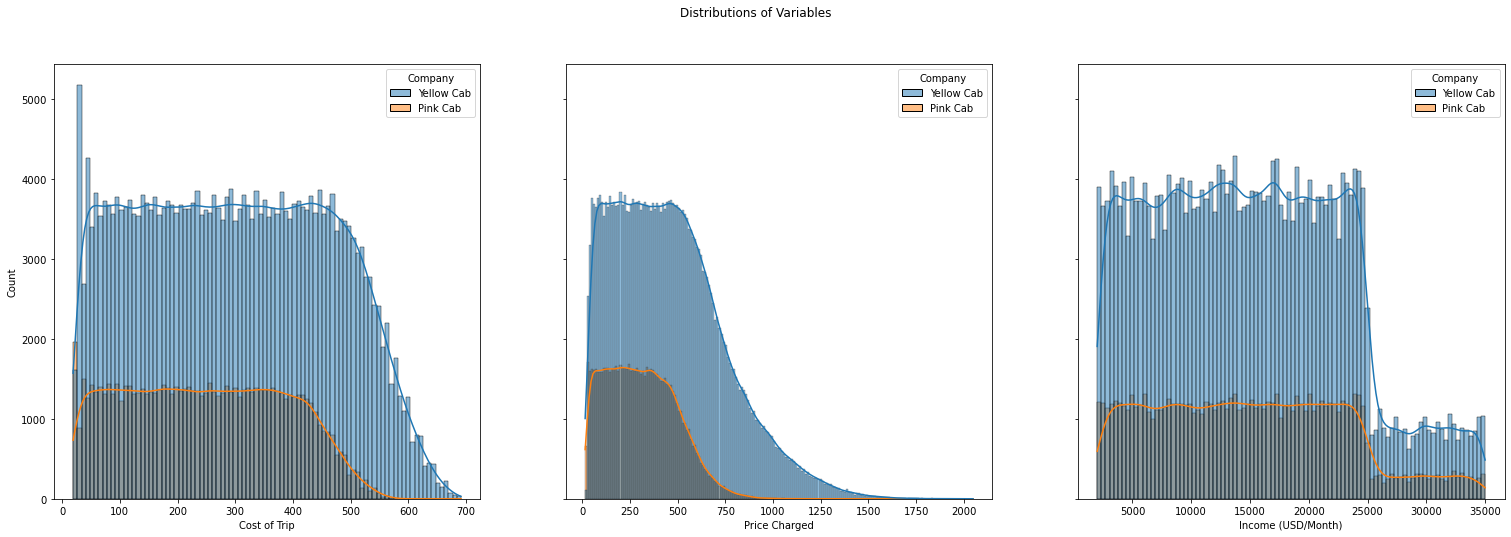

In [45]:

fig,axes = plt.subplots(1, 3 , figsize=(26,8), sharey=True)
fig.suptitle('Distributions of Variables')
sns.histplot(ax=axes[0], data=DF , x='Cost of Trip' , kde = True , hue="Company")
sns.histplot(ax=axes[1], data=DF , x='Price Charged' , kde = True , hue="Company")
sns.histplot(ax=axes[2], data=DF , x='Income (USD/Month)' , kde = True , hue="Company") 



<AxesSubplot:xlabel='KM Travelled', ylabel='Count'>

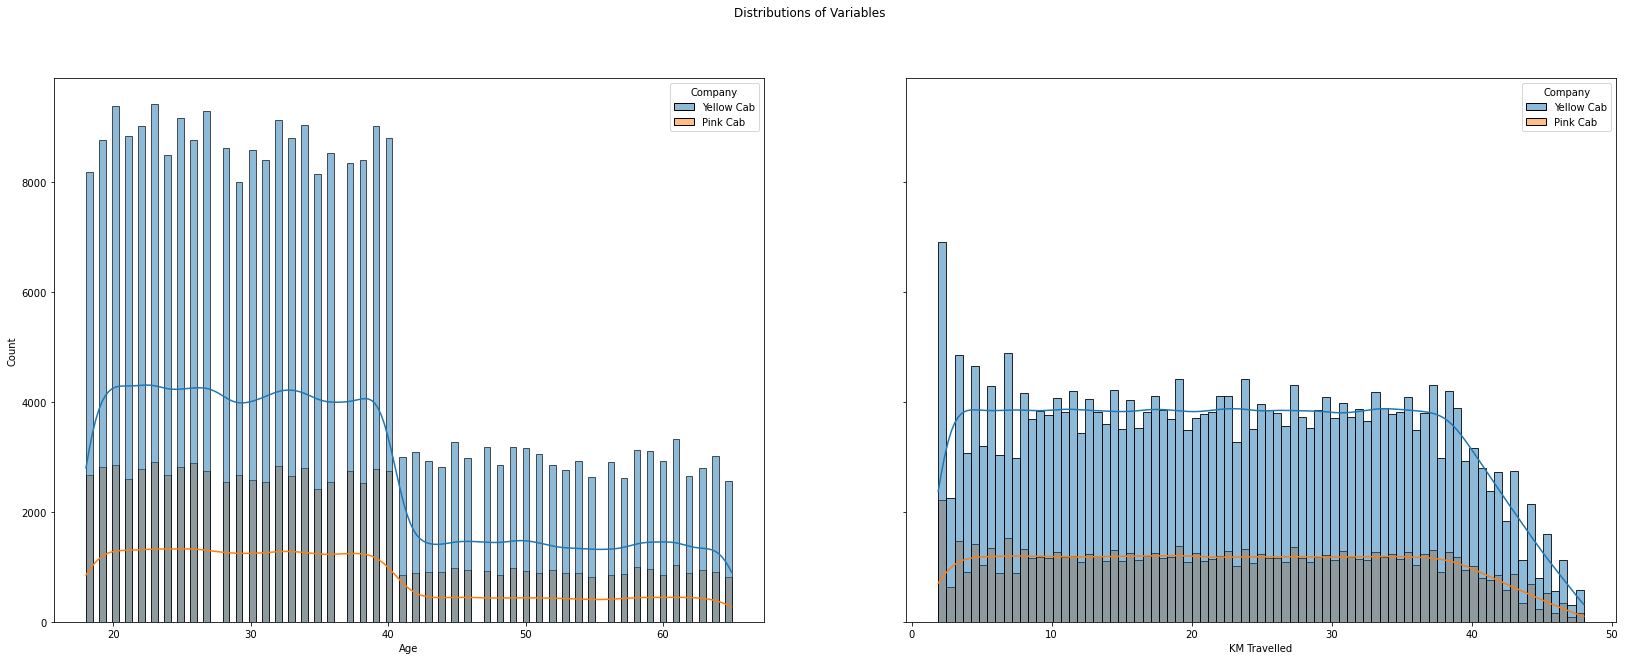

In [46]:
fig,axes = plt.subplots(1, 2 , figsize=(28,10), sharey=True)
fig.suptitle('Distributions of Variables')
sns.histplot(ax=axes[0], data=DF , x ='Age' , kde = True , hue="Company")
sns.histplot(ax=axes[1], data=DF , x ='KM Travelled' , kde = True , hue="Company") 






Text(0.5, 0, 'Payment Mode')

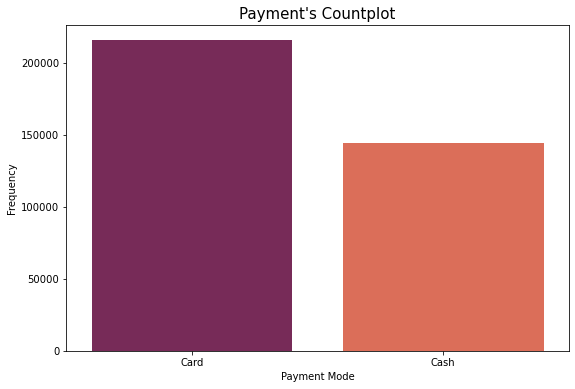

In [47]:
plt.figure(figsize=(9,6))
sns.countplot(data=DF , x="Payment_Mode", palette='rocket')
plt.title("Payment's Countplot", fontsize=15)
plt.ylabel('Frequency')
plt.xlabel('Payment Mode')

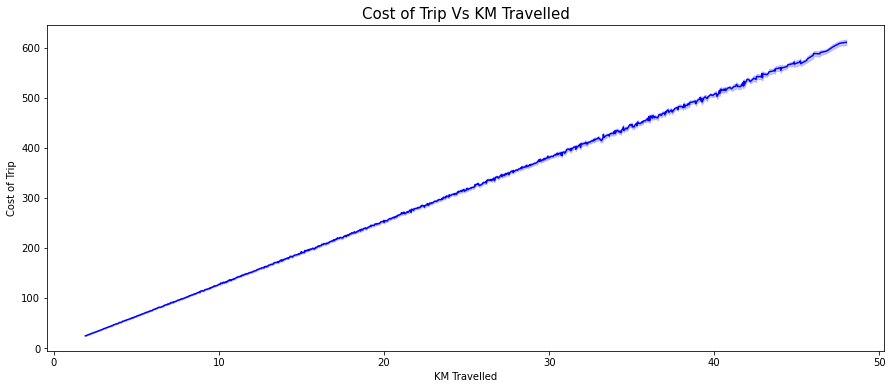

In [48]:
plt.figure(figsize=(15,6))
sns.lineplot(data=DF, x="KM Travelled",y='Cost of Trip', color= 'blue')
plt.title('Cost of Trip Vs KM Travelled', fontsize=15)
plt.xlabel('KM Travelled')
plt.ylabel('Cost of Trip')
plt.show()

Text(0.5, 0, 'is_holiday')

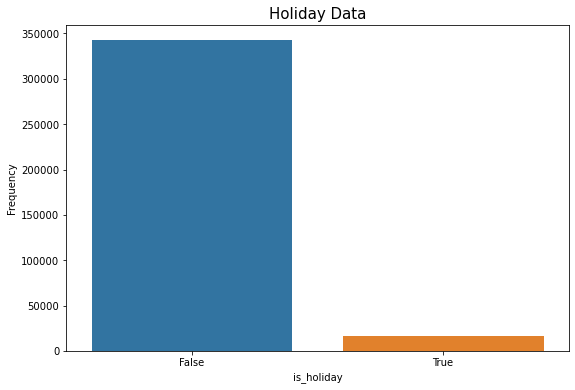

In [49]:
plt.figure(figsize=(9,6))
sns.countplot(data=DF, x="is_holiday" )
plt.title('Holiday Data', fontsize=15)
plt.ylabel('Frequency')
plt.xlabel('is_holiday')


In [50]:
DF.apply(lambda x: sum(x.isnull()),axis=0)


Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
is_holiday            0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

In [51]:
duplicated_rows = DF[DF.duplicated()]
print('The number of duplicated rows', duplicated_rows.shape[0])

The number of duplicated rows 0


Text(0.5, 1.0, 'Price_Charged - Cost_of_Trip')

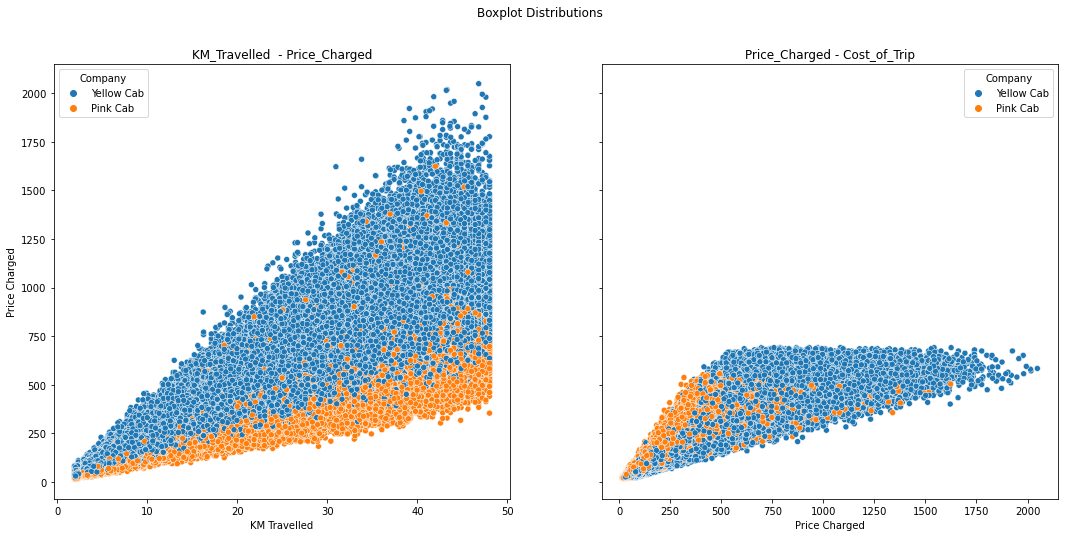

In [75]:
fig,axes = plt.subplots(1, 2, figsize=(18, 8), sharey=True)
fig.suptitle('Boxplot Distributions')
sns.scatterplot(ax=axes[0],data=DF, x='KM Travelled', y='Price Charged' , hue="Company"  ).set_title("KM_Travelled  - Price_Charged")
sns.scatterplot(ax=axes[1],data=DF, x='Price Charged', y='Cost of Trip' , hue="Company").set_title("Price_Charged - Cost_of_Trip")

Text(0, 0.5, 'Yellow Cab')

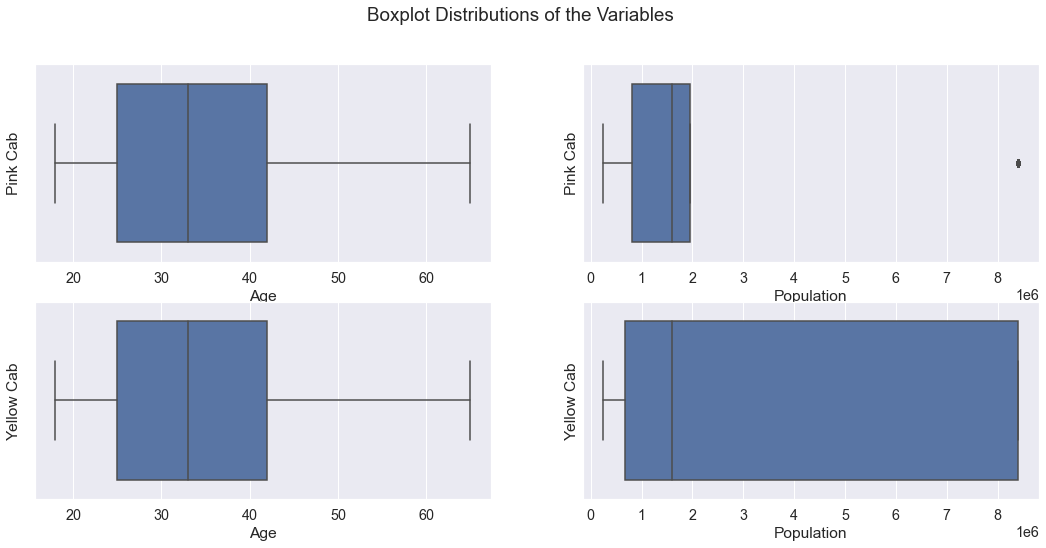

In [107]:
fig,axes = plt.subplots(2, 2, figsize=(18, 8), sharey=True)

fig.suptitle('Boxplot Distributions of the Variables')

sns.boxplot(ax=axes[0,0], x='Age' ,                 data=Pink_Cab_df ).set_ylabel("Pink Cab")

#sns.boxplot(ax=axes[0,1], x ='Income(USD/Month)' ,  data= Pink_Cab_df  ) .set_ylabel("Pink Cab")
sns.boxplot(ax=axes[0,1], x = 'Population' ,          data=Pink_Cab_df ).set_ylabel("Pink Cab")

sns.boxplot(ax=axes[1,0], x='Age' ,                 data=Yellow_Cab_df ).set_ylabel("Yellow Cab")

#sns.boxplot(ax=axes[1,1], x='Income_(USD/Month)' ,  data=Yellow_Cab_df  ) .set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,1], x='Population' ,          data=Yellow_Cab_df ).set_ylabel("Yellow Cab")

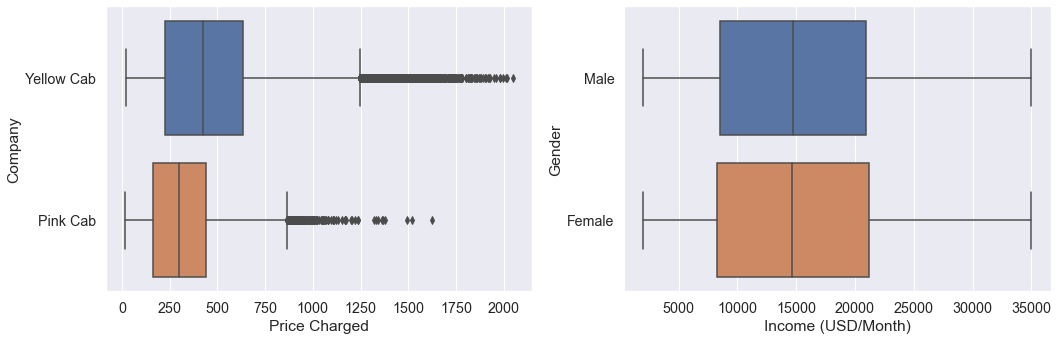

In [106]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.set(font_scale = 1.3)
sns.boxplot(data = DF, y = 'Company', x = "Price Charged", dodge=False)


plt.subplot(1,2,2)
sns.set(font_scale = 1.3)
sns.boxplot(data = DF, y = 'Gender', x = "Income (USD/Month)", dodge=False)


plt.tight_layout()
plt.show()

In [124]:
DF['Year of Travel'] = DF['Date of Travel'].dt.year
DF['Month of Travel'] = DF['Date of Travel'].dt.month
DF['Day of Travel'] = DF['Date of Travel'].dt.day
DF['Profit'] = DF['Price Charged'] - DF['Cost of Trip']

DF_index=DF.set_index('Date of Travel')
DF.sort_values('Date of Travel')
DF.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,is_holiday,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit,Year of Travel,Month of Travel,Day of Travel
0,10001340,2016-01-01,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,True,52536,Card,Male,24,10606,418859.0,127001.0,66.6760,2016,1,1
1,10020018,2016-03-25,Yellow Cab,WASHINGTON DC,5.94,88.50,74.1312,False,52536,Cash,Male,24,10606,418859.0,127001.0,14.3688,2016,3,25
2,10102932,2016-11-08,Pink Cab,WASHINGTON DC,15.21,179.33,153.6210,False,52536,Cash,Male,24,10606,418859.0,127001.0,25.7090,2016,11,8
3,10164725,2017-04-16,Yellow Cab,WASHINGTON DC,8.08,123.21,104.7168,True,52536,Card,Male,24,10606,418859.0,127001.0,18.4932,2017,4,16
4,10188478,2017-06-23,Yellow Cab,WASHINGTON DC,13.80,283.74,168.9120,False,52536,Cash,Male,24,10606,418859.0,127001.0,114.8280,2017,6,23


In [119]:
DF.dtypes

Transaction ID                 int64
Date of Travel        datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
is_holiday                      bool
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)             int64
Population                   float64
Users                        float64
Profit                       float64
Year of Travel                 int64
Month of Travel                int64
Day of Travel                  int64
dtype: object

In [140]:
print('yellow cab shape is ' , Yellow_Cab_df.shape)
 
print ('Yellow Cab  shape is ', Pink_Cab_df.shape)

yellow cab shape is  (274681, 7)
Yellow Cab  shape is  (84711, 7)


In [150]:
POT=DF.groupby(['Company', 'Year of Travel']).Profit.sum().to_frame('Profit')
POT.head(6)

Profit
Company    Year of Travel              
Pink Cab   2016            1.739883e+06
           2017            2.015101e+06
           2018            1.552345e+06
Yellow Cab 2016            1.407389e+07
           2017            1.646427e+07
           2018            1.348222e+07

In [151]:
QS=DF.groupby(['Company', 'Year of Travel'])['Price Charged'].sum().to_frame('Price')
QS['%Profit'] =(POT['Profit']*100) /QS['Price']

QS.head(6)

Price    %Profit
Company    Year of Travel                        
Pink Cab   2016             7986269.04  21.785926
           2017             9530736.47  21.143179
           2018             8811245.82  17.617770
Yellow Cab 2016            38833629.82  36.241491
           2017            45582913.86  36.119383
           2018            41437343.51  32.536399

<AxesSubplot:>

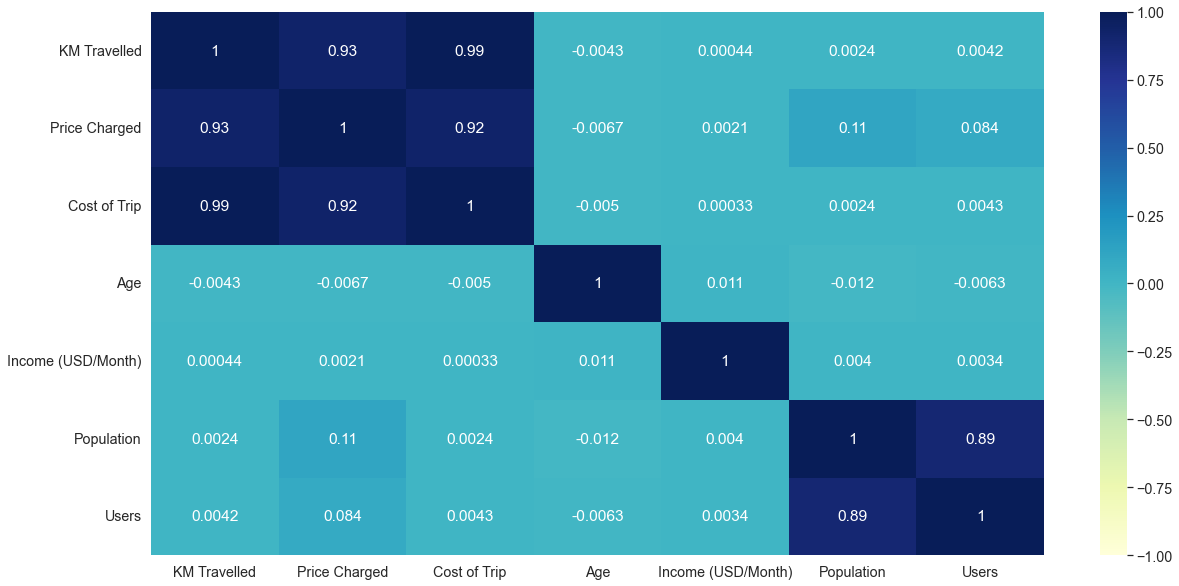

In [143]:
Pink_Cab_Corr = Pink_Cab_df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(Pink_Cab_Corr,annot=True,vmin=-1,vmax=1,cmap='YlGnBu')


<AxesSubplot:>

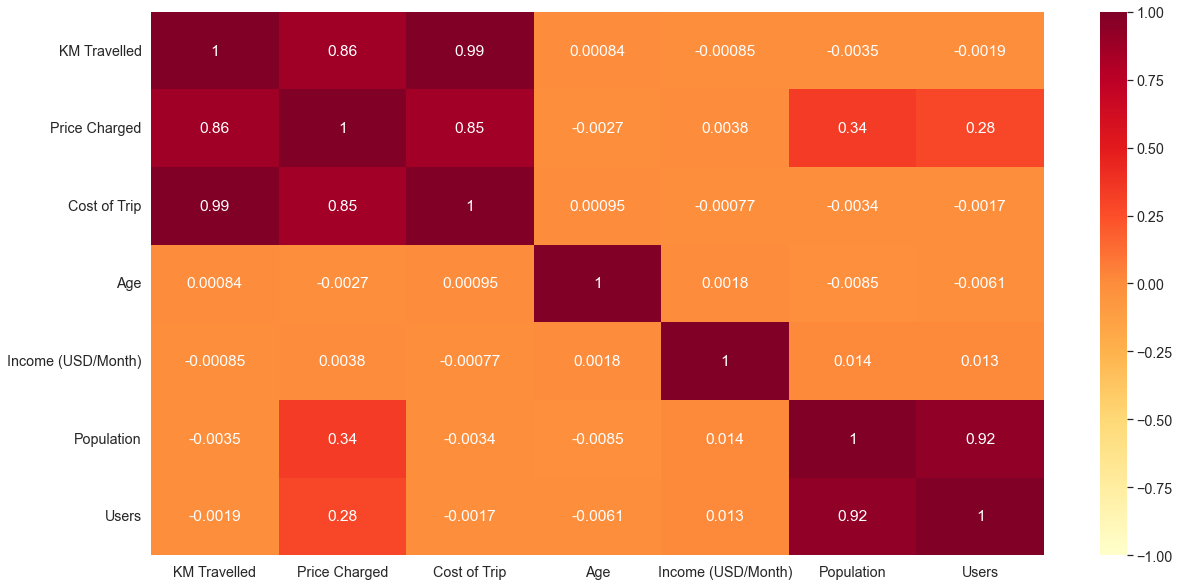

In [145]:
Yellow_Cab_Corr = Yellow_Cab_df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(Yellow_Cab_Corr,annot=True,vmin=-1,vmax=1,cmap='YlOrRd')
